# B9122 Computing for Business Research HW1 - Xingchao Gao

## Question 1

In [1]:
def emi(rate, N, PV, FV):
    return (PV+FV/(1+rate)**N)*(rate*(1+rate)**N/((1+rate)**N-1))

def data_input():
    try:
        PV = int(input('Please input PV:'))
        FV = int(input('Please input FV:'))
    except: 
        print('You must input an integer.')
        data_input()
    return PV,FV

rate = 0.04
N = 20
PV,FV = data_input()
print(emi(rate, N, PV, FV))

Please input PV:100
Please input FV:200
14.074525098588653


## Question 2

In [2]:
with open('question2.txt','r') as file_input, open('output.txt','w') as file_output:
    words = file_input.read().lower().split()
    unique_words = set(words)
    dic={}
    for wrd in unique_words:
        dic[wrd] = len(wrd)
    for wrd,lenth in sorted(dic.items(), key=lambda item: item[1], reverse=True):
        print(wrd, file=file_output)
        print(wrd)

established
university
selective
manhattan
business
columbia
schools
school
league
oldest
among
world
1916
most
york
city
top
six
ivy
one
and
new
the
of
is
in
it


## Question 3

The dataset of 2012 school level SAT results for New York City is downloaded from NYC Open Data.
https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4.

In [3]:
import numpy as np
import pandas as pd
data_original = pd.read_csv('2012_SAT_Results.csv', names=['dbn','school','number','reading_score','math_score','writing_score'],header=1)
data = data_original.head(100)
data

,dbn,school,number,reading_score,math_score,writing_score
0,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
1,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
2,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
3,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
4,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
...,...,...,...,...,...,...
95,06M457,GEORGE WASHINGTON YABC,7,394,357,346
96,06M462,HIGH SCHOOL FOR INTERNATIONAL BUSINESS AND FIN...,76,365,384,378
97,06M463,HIGH SCHOOL FOR MEDIA AND COMMUNICATIONS,63,369,380,349
98,06M467,HIGH SCHOOL FOR LAW AND PUBLIC SERVICE,94,363,378,361


In [4]:
data = data.apply(pd.to_numeric, errors='ignore')
data.dtypes

dbn              object
school           object
number            int64
reading_score     int64
math_score        int64
writing_score     int64
dtype: object

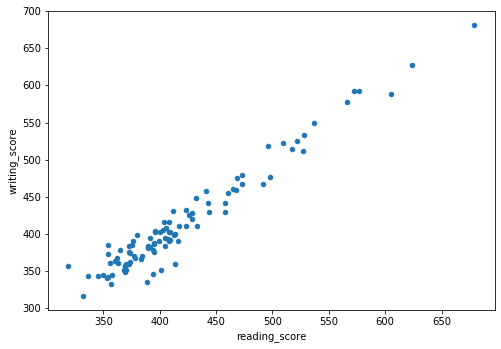

In [5]:
data.plot.scatter(x='reading_score',y='writing_score',figsize=(8,5.5))

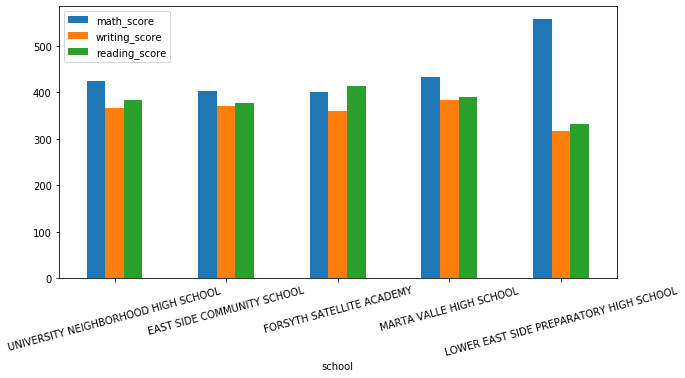

In [6]:
five_schools = data.head(5)
five_schools.plot.bar(x='school',y={'reading_score','math_score','writing_score'},rot=15,figsize=(10,5))

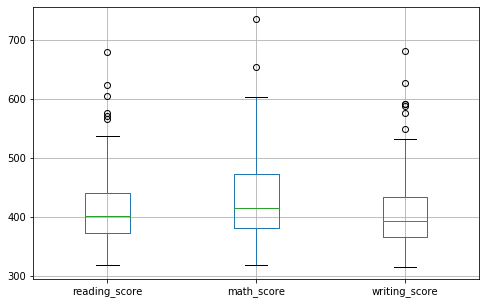

In [7]:
data.boxplot(column=['reading_score','math_score','writing_score'],figsize=(8,5))

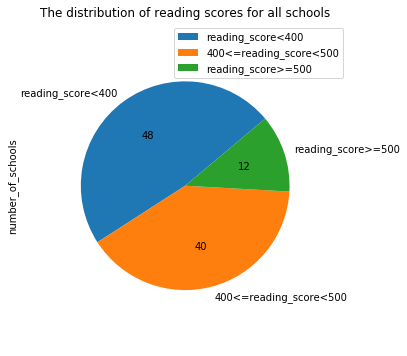

In [8]:
n1 = len(data.query('reading_score<400'))
n2 = len(data.query('reading_score>=400 & reading_score<500'))
n3 = len(data.query('reading_score>=500'))

df = pd.DataFrame({'number_of_schools':[n1,n2,n3]},index=['reading_score<400','400<=reading_score<500','reading_score>=500'])
df.plot.pie(y='number_of_schools',autopct='%.0f',radius=0.8,startangle=40,figsize=(6,6),title='The distribution of reading scores for all schools')